# Problem 1: Linear Regression

## The comp-activ databases is a collection of a computer systems activity measures .
## The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

## As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

### DATA DICTIONARY:
-----------------------
System measures used:

1. lread - Reads (transfers per second ) between system memory and user memory
2. lwrite - writes (transfers per second) between system memory and user memory
3. scall - Number of system calls of all types per second
4. sread - Number of system read calls per second .
5. swrite - Number of system write calls per second .
6. fork - Number of system fork calls per second.
7. exec - Number of system exec calls per second.
8. rchar - Number of characters transferred per second by system read calls
9. wchar - Number of characters transfreed per second by system write calls
10. pgout - Number of page out requests per second
11. ppgout - Number of pages, paged out per second
12. pgfree - Number of pages per second placed on the free list.
13. pgscan - Number of pages checked if they can be freed per second
14. atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
15. pgin - Number of page-in requests per second
16. ppgin - Number of pages paged in per second
17. pflt - Number of page faults caused by protection errors (copy-on-writes).
18. vflt - Number of page faults caused by address translation .
19. runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
20. freemem - Number of memory pages available to user processes
21. freeswap - Number of disk blocks available for page swapping.
22. usr - Portion of time (%) that cpus run in user mode

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [224]:
#import required libraries
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [225]:
#upload the required data
df = pd.read_excel("compactiv (1).xlsx")

In [104]:
#print first 5 rows
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [26]:
#print last 5 rows
df.tail()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
8187,16,12,3009,360,244,1.6,5.81,405250.0,85282.0,8.02,...,55.11,0.6,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.4,1.80,89489.0,41764.0,3.80,...,0.20,0.8,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90
8189,16,5,3116,289,190,0.6,0.60,325948.0,52640.0,0.40,...,0.00,0.4,28.40,45.20,60.20,219.80,Not_CPU_Bound,400,969106,87
8190,32,45,5180,254,179,1.2,1.20,62571.0,29505.0,1.40,...,18.04,0.4,23.05,24.25,93.19,202.81,CPU_Bound,141,1022458,83
8191,2,0,985,55,46,1.6,4.80,111111.0,22256.0,0.00,...,0.00,0.2,3.40,6.20,91.80,110.00,CPU_Bound,659,1756514,94


In [27]:
#infomation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

Insights:
1. Data consists of both categorical and numerical values. 
2. There are total of 8192 rows and 22 columns in the dataset. Out of 22, only 1 columns is of object type,8 columns are of integer type and remaining 13 are of float type data.

In [28]:
#description of dataset
df.describe(include = 'all' )

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8.088000e+03,8.177000e+03,8192.000000,...,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192,8192.000000,8.192000e+03,8192.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Not_CPU_Bound,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4331,NaN,NaN,NaN
mean,19.559692,13.106201,2306.318237,210.479980,150.058228,1.884554,2.791998,1.973857e+05,9.590299e+04,2.285317,...,21.526849,1.127505,8.277960,12.388586,109.793799,185.315796,NaN,1763.456299,1.328126e+06,83.968872
std,53.353799,29.891726,1633.617322,198.980146,160.478980,2.479493,5.212456,2.398375e+05,1.408417e+05,5.307038,...,71.141340,5.708347,13.874978,22.281318,114.419221,191.000603,NaN,2482.104511,4.220194e+05,18.401905
min,0.000000,0.000000,109.000000,6.000000,7.000000,0.000000,0.000000,2.780000e+02,1.498000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,NaN,55.000000,2.000000e+00,0.000000
25%,2.000000,0.000000,1012.000000,86.000000,63.000000,0.400000,0.200000,3.409150e+04,2.291600e+04,0.000000,...,0.000000,0.000000,0.600000,0.600000,25.000000,45.400000,NaN,231.000000,1.042624e+06,81.000000
50%,7.000000,1.000000,2051.500000,166.000000,117.000000,0.800000,1.200000,1.254735e+05,4.661900e+04,0.000000,...,0.000000,0.000000,2.800000,3.800000,63.800000,120.400000,NaN,579.000000,1.289290e+06,89.000000
75%,20.000000,10.000000,3317.250000,279.000000,185.000000,2.200000,2.800000,2.678288e+05,1.061010e+05,2.400000,...,0.000000,0.600000,9.765000,13.800000,159.600000,251.800000,NaN,2002.250000,1.730380e+06,94.000000


In [30]:
#shape of the dataset
df.shape

(8192, 22)

In [34]:
#checking for duplicate rows
# Are there any duplicates
duplicate = df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))
#df[duplicate]

Number of duplicate rows = 0


In [35]:
#Exploratory Data Analysis
#Univariate Analysis
df[['lread','lwrite']].describe()

,lread,lwrite
count,8192.000000,8192.000000
mean,19.559692,13.106201
std,53.353799,29.891726
min,0.000000,0.000000
25%,2.000000,0.000000
50%,7.000000,1.000000
75%,20.000000,10.000000
max,1845.000000,575.000000


Insights:
The reads between system and memory has maximum value than writes between system and memory.

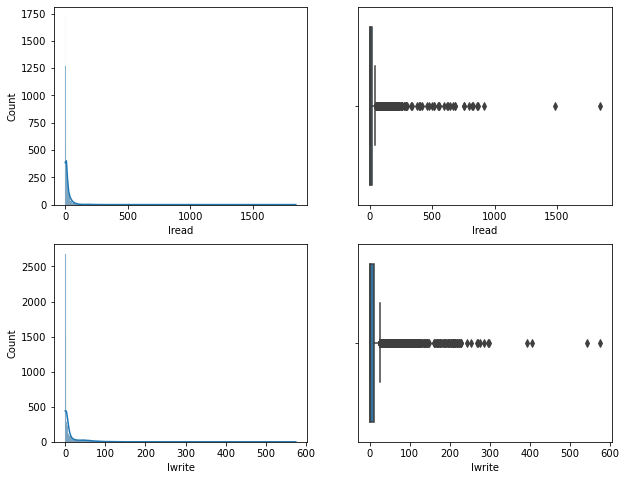

In [36]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
sns.histplot(df['lread'], kde=True, ax=axes[0][0])
sns.boxplot(x='lread', data=df, ax=axes[0][1])
sns.histplot(df['lwrite'] , kde=True, ax=axes[1][0])
sns.boxplot(x='lwrite', data=df , ax=axes[1][1])
plt.show()

Insights:
There are more outliers in writes between system and memory than reads between system and memory

In [37]:
#categorial varaible
df['runqsz'].value_counts(normalize=True)

Not_CPU_Bound    0.528687
CPU_Bound        0.471313
Name: runqsz, dtype: float64

Insights :
There are highest queue size process runs in Not_CPU_Bound than CPU-Bound.

<AxesSubplot:xlabel='runqsz', ylabel='count'>

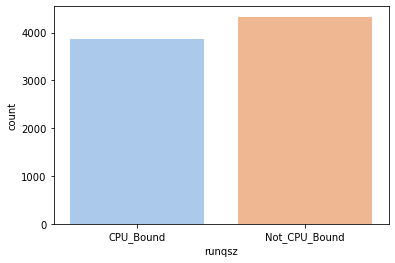

In [38]:
sns.countplot(x='runqsz', data=df, palette='pastel')

Insights:
Not_CPU_Bound has the highest count than the CPU_bound

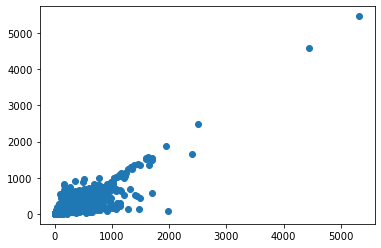

In [39]:
#Bivariate analysis
#Numeric vs Numeric
plt.scatter(df['sread'],df['swrite'])

Insight:
There is a positive correlation between sread and swrite.

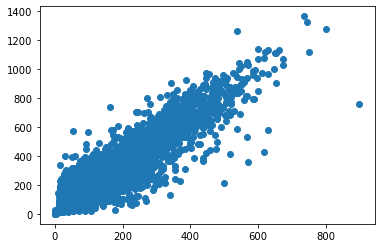

In [40]:
plt.scatter(df['pflt'],df['vflt'])

Insight:
There is a highest positive correlation between pflt and vflt.

<AxesSubplot:xlabel='runqsz', ylabel='usr'>

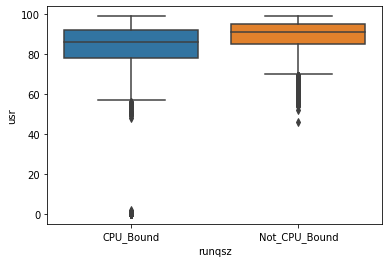

In [41]:
#Categorical vs Numeric
fig_dims = (12, 5)
sns.boxplot(x='runqsz', y='usr', data=df)

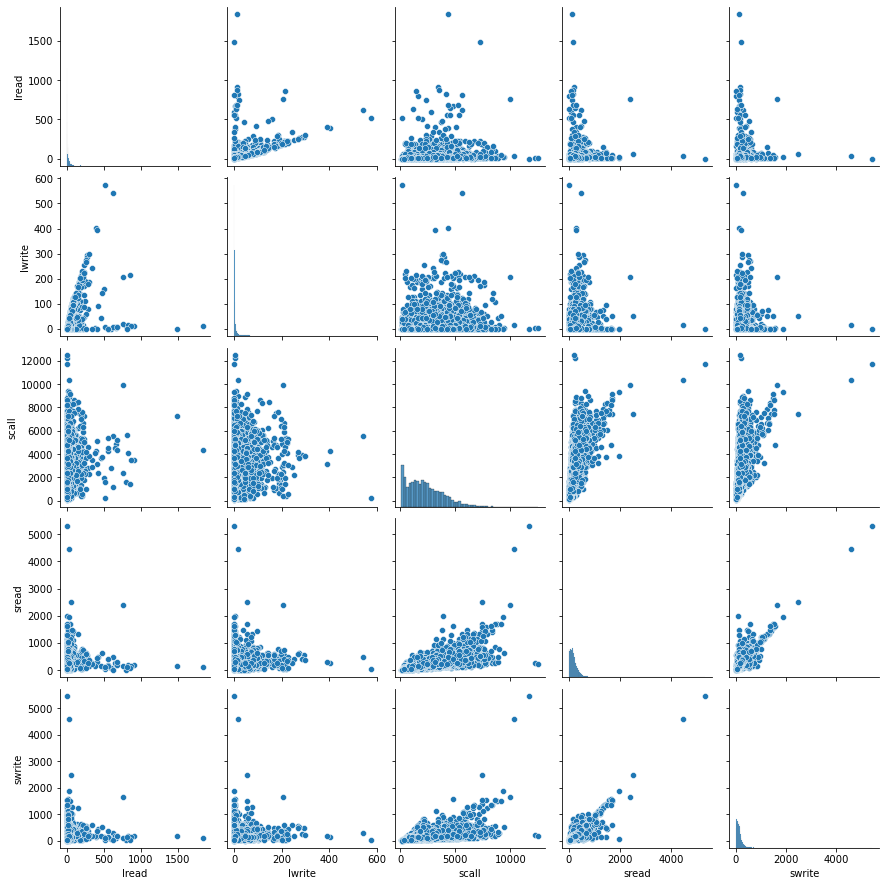

In [52]:
sns.pairplot(data=df[['lread','lwrite','scall','sread','swrite']])

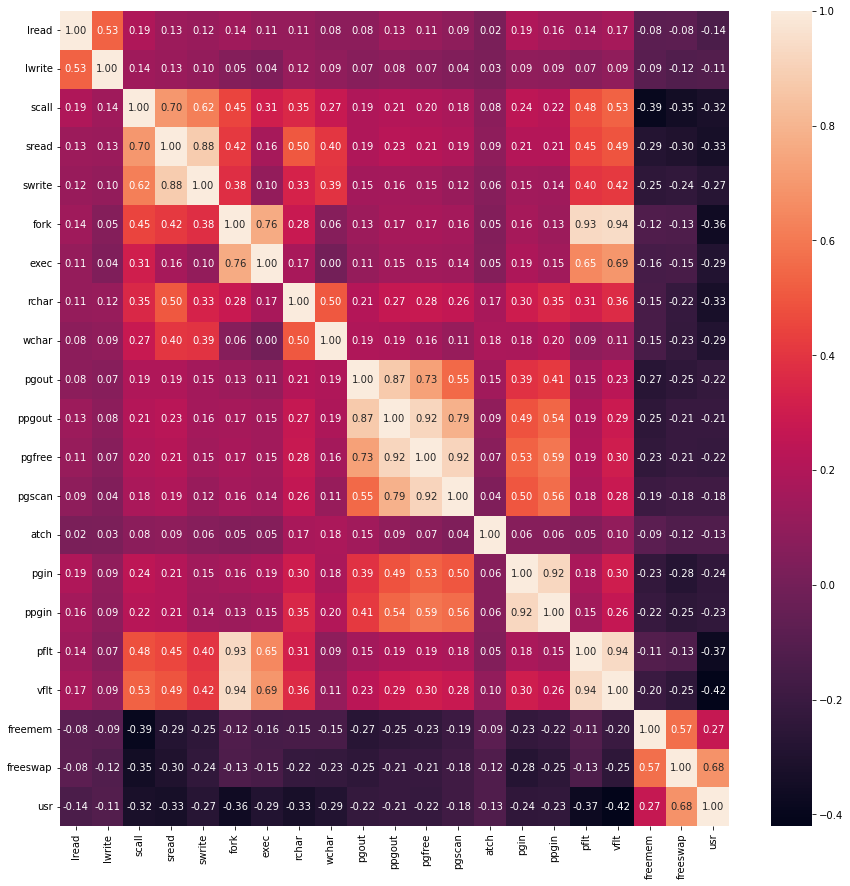

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

usr                   0     1     2      46     48     49      50     51  \
runqsz                                                                     
CPU_Bound      86.459364  85.0  82.0    NaN  182.0  193.0  200.75  146.5   
Not_CPU_Bound        NaN   NaN   NaN  168.0    NaN    NaN     NaN    NaN   

usr               52     53  ...           90           91           92  \
runqsz                       ...                                          
CPU_Bound      245.0  208.6  ...  1370.717172  1449.442786  1410.969072   
Not_CPU_Bound  187.0    NaN  ...  1801.850575  1543.020243  1719.030172   

usr                     93           94           95           96  \
runqsz                                                              
CPU_Bound      1541.285024  1717.817204  1684.440252  1994.439394   
Not_CPU_Bound  1787.553922  1611.319149  2489.186992  2947.902878   

usr                     97           98           99  
runqsz                                                
CPU_Bou

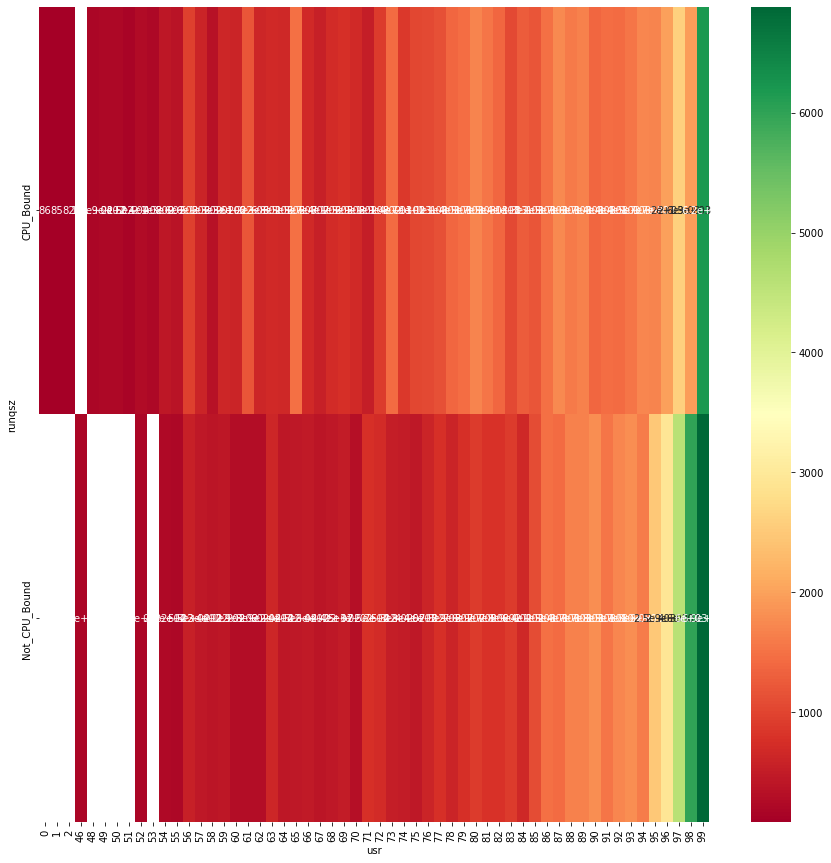

In [57]:
#multivariate analysis
result = pd.pivot_table(data=df, index='runqsz', columns='usr',values='freemem')
print(result)

#Heat map
plt.figure(figsize=(15,15))
sns.heatmap(result, annot=True, cmap = 'RdYlGn')

plt.show()

Insights:
1. 'usr’  is the target variable and all other are predector variables.
2. Looking into the fields in the univariate analsysis, we see there are outliers that needs to be treated
3. Bivariate and multivariate analysis indicates that there is strong positive correlation between the target variable usr and the predictor variables freemem and freeswap.
4. We also notice that there are no duplicates records in the given data set.

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [58]:
#check null values
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [75]:
df1 = df
df1['rchar']=df1['rchar'].fillna(df1['rchar'].mean())
df1['wchar']=df1['wchar'].fillna(df1['wchar'].mean())

In [76]:
df1.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [77]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8187    False
8188    False
8189    False
8190    False
8191    False
Length: 8192, dtype: bool

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wchar'>

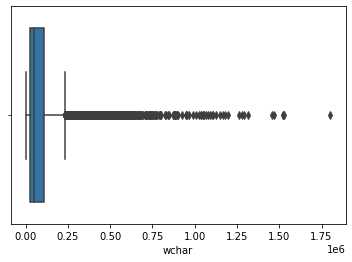

In [78]:
sns.boxplot(df1['wchar'])

Insights:
1. In this case, it is not necessary to scale the data as, we'll get an equivalent solution whether we apply some kind of linear scaling or not. For example, to find the best parameter values of a linear regression model, there is a closed-form solution, called the Normal Equation. If our implementation makes use of that equation, there is no stepwise optimization process, so feature scaling is not necessary.
2. Removing the records with 0 values is not a necessity, as it might not have an impact on the model building.
3. Observed null values in 2 fields rchar and wchar.
4. We imputed the null values with median value of the data set
5. Most of the of the continuous fields had outliers.

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [327]:
#Encoding the data for modelling
df2 = pd.get_dummies(df, prefix={'runqsz':'runqsz' },
                          drop_first=True)

In [328]:
#printing top 5 rows
df2.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4670,1730946,95,0
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,7278,1869002,97,1
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702,1021237,87,1
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,7248,1863704,98,1
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633,1760253,90,1


In [329]:
#dropping nan values
df2 = df2.dropna()

In [330]:
#Getting train and test variables
# independent variables
X = df2.drop(["usr"], axis=1)
# dependent variable
y = df2[["usr"]]

In [331]:
# let's add the intercept to data
X = sm.add_constant(X)

In [332]:
#We will now split X and y into train and test sets in a 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [340]:
#Fit Linear Model
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [335]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     485.4
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:56:02   Log-Likelihood:                -21589.
No. Observations:                5658   AIC:                         4.322e+04
Df Residuals:                    5636   BIC:                         4.337e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.4725 

Insights 1: 
1. R-squared is always between 0 and 100%:
2. 0% indicates that the model explains none of the variability of the response data around its mean.  100% indicates that the model explains all the variability of the response data around its mean. In general, the higher the R-squared, the better the model fits data.
3. In this case, R-squared value for ols summary is 0.644 respectively , which indicates that more than 63% of observed variance can be explained by model’s inputs.

Insights 2:
1. Using the P>|t| result, we can infer that the variables like sread, fork, ppgout ,pgfree and pgin are the statistically insignificant variables, as their p-value is greater than 0.05. 
2. Omnibus test checks the normality of the residuals once the model is deployed. If the value is zero, it means the residuals are perfectly normal. Here, in the example prob(Omnibus) is 0 indicating that there is 0% chance that the residuals are normally distributed. For a model to be robust, besides checking R-squared and other rubrics, the residual distribution is also required to be normal ideally.
3. This indicates that our model is not robust and not fit 
4. We can observe there are very strong multi collinearity present in the data set as the values are exceeding 10 or close to 0. Ideally, the values should be within 1 to 5.



In [317]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   26.269551
lread                    1.390956
lwrite                   1.341139
scall                    2.504061
sread                    6.604867
swrite                   5.275647
fork                    17.792436
exec                     3.026109
rchar                    1.992989
wchar                    1.651887
pgout                    5.269148
ppgout                  14.812586
pgfree                  19.169367
pgscan                   7.965892
atch                     1.091366
pgin                     7.747432
ppgin                    8.174250
pflt                    11.400452
vflt                    19.491280
freemem                  1.671631
freeswap                 1.750436
runqsz_Not_CPU_Bound     1.115098
dtype: float64



1. The VIF values indicate that the features fork , pgout,ppgout , pgfree , pgscan ,sread,swrite,pflt ,pgin,ppgin and vflt  are correlated with one or more independent features.
2. Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of acceleration, model year and origin variables.
3. To treat multicollinearity, we will have to drop one or more of the correlated features (fork , pgout,ppgout , pgfree , pgscan  4.We will drop the variable that has the least impact on the adjusted R-squared of the model.

In [318]:
#Removing the columns
X_train = X_train.drop(["fork", "pgout","ppgout" , "pgfree" , "pgscan" ,"sread","swrite","pflt" ,"pgin","ppgin", "vflt"], axis=1)

In [320]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   23.297679
lread                    1.338790
lwrite                   1.323638
scall                    1.478039
exec                     1.138454
rchar                    1.510071
wchar                    1.453747
atch                     1.051332
freemem                  1.605429
freeswap                 1.591955
runqsz_Not_CPU_Bound     1.100982
dtype: float64



Insights:
After removing the exceeded vif columns then all remaining columns has value Vif< 2.

In [321]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     851.7
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:46:36   Log-Likelihood:                -21909.
No. Observations:                5658   AIC:                         4.384e+04
Df Residuals:                    5647   BIC:                         4.391e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.0659 

## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [336]:
# let's check the model parameters
olsres.params

const                   42.472470
lread                   -0.020231
lwrite                   0.006093
scall                    0.000990
sread                    0.001059
swrite                  -0.002830
fork                    -1.930659
exec                    -0.033921
rchar                   -0.000004
wchar                   -0.000010
pgout                   -0.233641
ppgout                   0.132459
pgfree                  -0.095142
pgscan                   0.016606
atch                     0.000882
pgin                     0.072082
ppgin                   -0.049480
pflt                    -0.041760
vflt                     0.024513
freemem                 -0.001701
freeswap                 0.000033
runqsz_Not_CPU_Bound     8.075325
dtype: float64

In [339]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres.params[i], "* (", X_train.columns[i], ")")

usr = 42.472469699233116 + -0.02023071979268807 * ( lread ) +  0.006092956938534535 * ( lwrite ) +  0.0009901750277275761 * ( scall ) +  0.0010591222437147346 * ( sread ) +  -0.00282976176355788 * ( swrite ) +  -1.9306588000717144 * ( fork ) +  -0.03392123608967726 * ( exec ) +  -3.910452688661128e-06 * ( rchar ) +  -1.0478344138416642e-05 * ( wchar ) +  -0.23364070137576834 * ( pgout ) +  0.13245910897107332 * ( ppgout ) +  -0.09514151937121246 * ( pgfree ) +  0.016606129121971475 * ( pgscan ) +  0.0008819256978773032 * ( atch ) +  0.07208212657556601 * ( pgin ) +  -0.049479815176147406 * ( ppgin ) +  -0.04176028962936548 * ( pflt ) +  0.024512570881046976 * ( vflt ) +  -0.001701426774424474 * ( freemem ) +  3.3465356191729587e-05 * ( freeswap ) +  8.075325421441427 * ( runqsz_Not_CPU_Bound )


# Problem 2: Logistic Regression, LDA and CART

## You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

## The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

### Data Dictionary:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [420]:
df = pd.read_excel("Contraceptive_method_dataset.xlsx")

In [342]:
#print first 5 rows
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [343]:
#print last 5 rows
df.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


In [345]:
#shape of the dataset
df.shape

(1473, 10)

In [346]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [349]:
#checking null values
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [352]:
#checking duplicate rows
df.duplicated().sum()

80

<AxesSubplot:xlabel='Wife_age', ylabel='Count'>

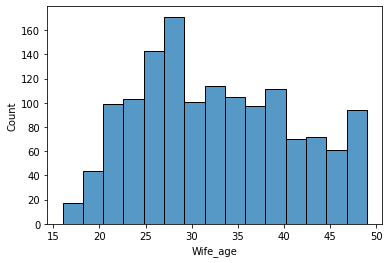

In [356]:
#univariate analysis
sns.histplot(data=df,x="Wife_age")

<AxesSubplot:xlabel='No_of_children_born', ylabel='Count'>

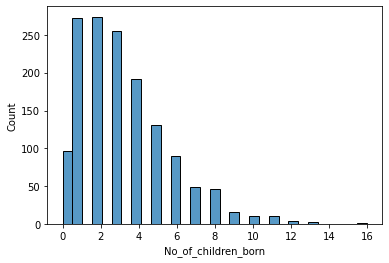

In [360]:
sns.histplot(data=df,x = "No_of_children_born")

<AxesSubplot:xlabel='Husband_Occupation', ylabel='Count'>

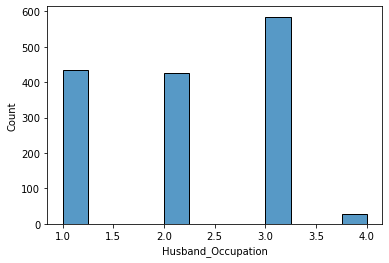

In [363]:
sns.histplot(data=df,x ="Husband_Occupation")

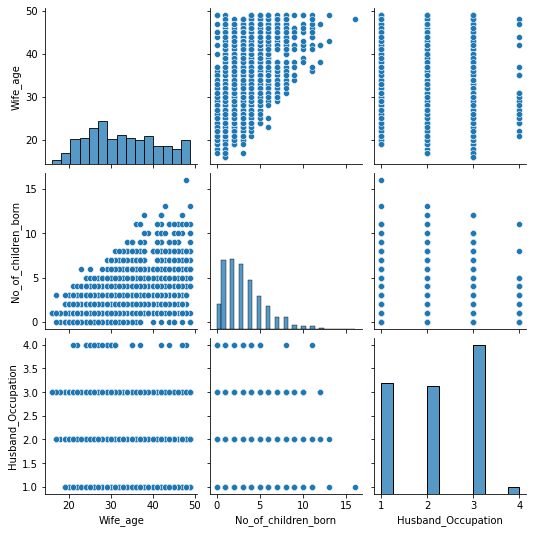

In [364]:
#Bivariate analysis
sns.pairplot(data=df)

<AxesSubplot:>

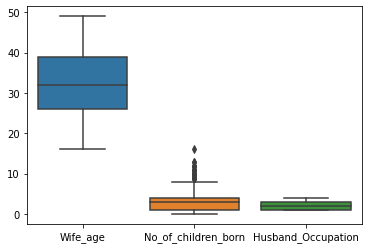

In [365]:
sns.boxplot(data=df)

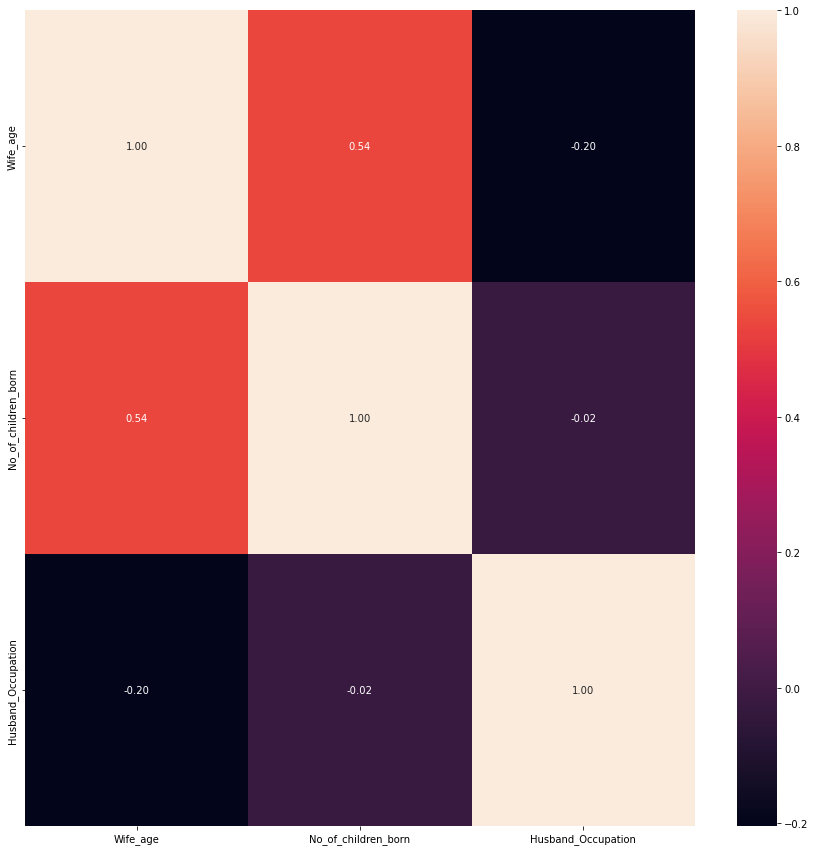

In [367]:
#multivaraite analysis
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

Insights:
1. Looking in to the boxplot between target variable contraceptive method used and the no_of_children_born, we see that , No_of_children_born is high in the case of use of contraception used.
2. Bivariate and multivariate analysis indicates that there is strong positive correlation between the fields wife_age and no_of_children_born
3. We also notice that there are 80 duplicates records in the given data set and has been removed.
4. Null values identified has been imputed with mean.
5. Data consists of both categorical and numerical values. 
6. There are total of 1473 rows and 10columns in the dataset. Out of 22, 7 columns are of  object type,1 columns of integer type and remaining 2 are of float type data.
7. 'contraceptive used’ is the target variable and all other are predector variables.
8. Looking into the fields in the univariate analysis, we see outliers is present only in the field number of children


## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

In [430]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [432]:
from sklearn import preprocessing 
df2 = df.apply(LabelEncoder().fit_transform)
df2

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,8,0,1,3,1,0,1,0,0,0
1,29,3,1,10,1,0,2,2,0,0
2,27,0,1,7,1,0,2,2,0,0
3,26,1,0,9,1,0,2,0,0,0
4,20,1,1,8,1,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1468,17,2,2,15,1,1,1,2,0,1
1469,17,2,2,15,1,0,0,2,0,1
1470,23,1,1,15,1,1,0,2,0,1
1471,17,1,1,15,1,1,1,1,0,1


In [434]:
#Getting train and test variables
# independent variables
X = df2.drop(["Contraceptive_method_used"], axis=1)
# dependent variable
y = df2[["Contraceptive_method_used"]]


In [435]:
# let's add the intercept to data
X = sm.add_constant(X)

In [436]:
#We will now split X and y into train and test sets in a 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

#### Logistic Regression

In [494]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [495]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [496]:
model.fit(X, y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [497]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [498]:
model.classes_

array([0, 1])

In [499]:
model.intercept_

array([0.11026314])

In [500]:
model.coef_

array([[ 0.11026314, -0.02678746,  0.14059485,  0.18320096,  0.20068059,
        -0.48048288, -0.1222323 , -0.04055461, -0.01516407, -1.24280421]])

In [501]:
model.predict_proba(X)

array([[0.43280107, 0.56719893],
       [0.18792325, 0.81207675],
       [0.37911418, 0.62088582],
       ...,
       [0.09067869, 0.90932131],
       [0.08012054, 0.91987946],
       [0.4583841 , 0.5416159 ]])

In [502]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [503]:
model.score(X, y)

0.6612355736591989

In [451]:
confusion_matrix(y, model.predict(X))

array([[243, 386],
       [113, 731]], dtype=int64)

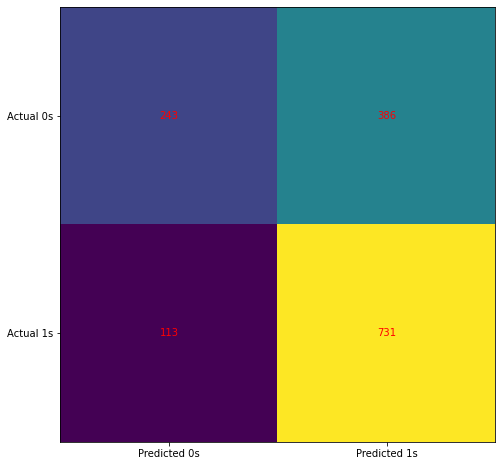

In [452]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [454]:
model = sm.Logit(y, X)

In [455]:
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.644003
         Iterations 5


In [456]:
result.params

const                       0.235576
Wife_age                   -0.026984
Wife_ education             0.144276
Husband_education           0.179559
No_of_children_born         0.202252
Wife_religion              -0.494521
Wife_Working               -0.124951
Husband_Occupation         -0.039157
Standard_of_living_index   -0.015281
Media_exposure             -1.309492
dtype: float64

In [458]:
result.predict(X)

0       0.567668
1       0.815259
2       0.622209
3       0.716203
4       0.740705
          ...   
1468    0.940984
1469    0.949464
1470    0.910726
1471    0.921330
1472    0.542507
Length: 1473, dtype: float64

In [459]:
(result.predict(X) >= 0.5).astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
1468    1
1469    1
1470    1
1471    1
1472    1
Length: 1473, dtype: int32

In [460]:
result.pred_table()

array([[242., 387.],
       [112., 732.]])

In [461]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     Contraceptive_method_used   No. Observations:                 1473
Model:                                 Logit   Df Residuals:                     1463
Method:                                  MLE   Df Model:                            9
Date:                       Sun, 27 Nov 2022   Pseudo R-squ.:                 0.05635
Time:                               17:55:52   Log-Likelihood:                -948.62
converged:                              True   LL-Null:                       -1005.3
Covariance Type:                   nonrobust   LLR p-value:                 3.149e-20
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2356      0.290      0.813      0.416      -0.333       0.804
Wife_age                    -0.0270      0.007     -3.715      0.000      -0.041      -0.013
Wife_ education              0.1443      0.063      2.281      0.023       0.020       0.268
Husband_education            0.1796      0.081      2.219      0.026       0.021       0.338
No_of_children_born          0.2023      0.027      7.400      0.000       0.149       0.256
Wife_religion               -0.4945      0.163     -3.037      0.002      -0.814      -0.175
Wife_Working                -0.1250      0.127     -0.987      0.324      -0.373       0.123
Husband_Occupation          -0.0392      0.068     -0.578      0.563      -0.172       0.094
Standard_of_living_index    -0.0153      0.055     -0.276      0.783      -0.124       0.093
Media_exposure              -1.3095      0.234     -5.585      0.000      -1.769      -0.850
============================================================================================
"""

#### LDA (linear discriminant analysis) 

In [511]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [512]:
#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [513]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.6515076300790585


In [470]:
# Predict it
pred_class = model.predict(X)
df2['Prediction'] = pred_class 


In [472]:
data= df2
Cor1 = data.corr()
Cor1

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used,Prediction
Wife_age,1.000000,0.191013,0.036311,0.399991,-0.141247,0.031713,-0.148526,0.042498,0.097607,0.001961,-0.075216
Wife_ education,0.191013,1.000000,0.220614,-0.003393,-0.091292,0.046367,-0.212173,0.040663,0.141375,0.041501,0.148812
Husband_education,0.036311,0.220614,1.000000,-0.132869,-0.149533,0.023975,-0.282421,0.014156,-0.167536,0.082352,0.334902
No_of_children_born,0.399991,-0.003393,-0.132869,1.000000,0.063952,-0.081723,-0.037280,0.003829,0.121116,0.153858,0.259778
Wife_religion,-0.141247,-0.091292,-0.149533,0.063952,1.000000,-0.069837,0.084417,-0.083744,0.060243,-0.072946,-0.176379
Wife_Working,0.031713,0.046367,0.023975,-0.081723,-0.069837,1.000000,-0.014232,0.012601,-0.001828,-0.039370,-0.137019
Husband_Occupation,-0.148526,-0.212173,-0.282421,-0.037280,0.084417,-0.014232,1.000000,-0.070682,0.113925,-0.062412,-0.216090
Standard_of_living_index,0.042498,0.040663,0.014156,0.003829,-0.083744,0.012601,-0.070682,1.000000,0.042257,-0.008003,-0.054696
Media_exposure,0.097607,0.141375,-0.167536,0.121116,0.060243,-0.001828,0.113925,0.042257,1.000000,-0.143948,-0.461039
Contraceptive_method_used,0.001961,0.041501,0.082352,0.153858,-0.072946,-0.039370,-0.062412,-0.008003,-0.143948,1.000000,0.288097


In [474]:
confusion_matrix(y, pred_class)

array([[230, 399],
       [103, 741]], dtype=int64)

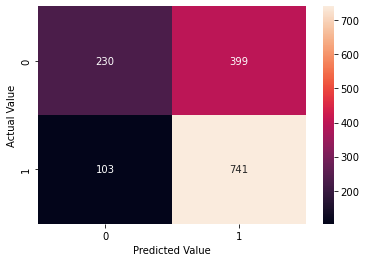

In [475]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [476]:
from sklearn.metrics import classification_report
print(classification_report(y, pred_class))

              precision    recall  f1-score   support

           0       0.69      0.37      0.48       629
           1       0.65      0.88      0.75       844

    accuracy                           0.66      1473
   macro avg       0.67      0.62      0.61      1473
weighted avg       0.67      0.66      0.63      1473



In [477]:
X.shape

(1473, 10)

In [478]:
model.coef_

array([[-0.        , -0.02391364,  0.1385094 ,  0.17950957,  0.17717194,
        -0.47882516, -0.14179859, -0.03924888, -0.01943423, -1.26837454]])

In [479]:
model.intercept_

array([0.26758807])

#### The lda for the above model is
LDA=0.267+ X1*(-0.) + X2*(-0.023) + X3*( 0.138) + X4*(0.179) + X5*(0.177) + X6*(-0.478) + X7*(-0.141) + X8*(-0.039) + X9*(-0.019) + X10*(-1.268)

#### So from the above equation the following things can be summarized as
1. The coeff of X10 predictor is largest in magnitude thus it helps in discriminating the target the best
2. The coeff of X1 predictor is smallest in magnitude thus it helps in discriminating the target the least.
3. All the DS can be computed for each row using the above f(x) which will aid in classification

#### CART

In [483]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [484]:
from sklearn.tree import DecisionTreeClassifier

In [485]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [486]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [487]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [488]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                               Imp
const                     0.000000
Wife_age                  0.357754
Wife_ education           0.075831
Husband_education         0.052749
No_of_children_born       0.237189
Wife_religion             0.041051
Wife_Working              0.051520
Husband_Occupation        0.079569
Standard_of_living_index  0.088918
Media_exposure            0.015418


In [489]:
y_predict = dt_model.predict(X_test)

In [490]:
#Regularising the Decision Tree
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [491]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
const                     0.000000
Wife_age                  0.357754
Wife_ education           0.075831
Husband_education         0.052749
No_of_children_born       0.237189
Wife_religion             0.041051
Wife_Working              0.051520
Husband_Occupation        0.079569
Standard_of_living_index  0.088918
Media_exposure            0.015418


## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

Logistic Regression

In [504]:
#Model Evaluation
model.score(X, y)

0.6612355736591989

AUC: 0.791


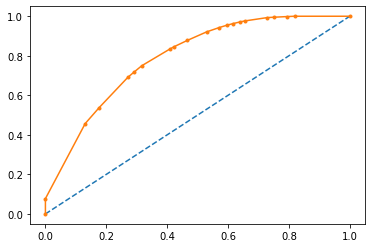

In [505]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.754


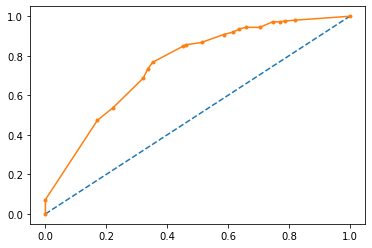

In [506]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

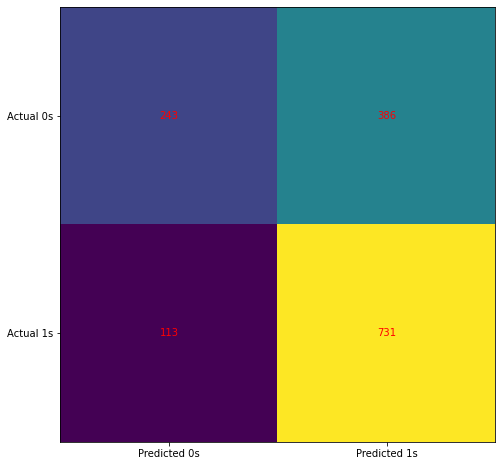

In [507]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [508]:
from sklearn.metrics import classification_report,confusion_matrix

In [509]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65       436
           1       0.73      0.85      0.78       595

    accuracy                           0.73      1031
   macro avg       0.73      0.71      0.72      1031
weighted avg       0.73      0.73      0.73      1031



In [510]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       193
           1       0.71      0.86      0.77       249

    accuracy                           0.72       442
   macro avg       0.72      0.70      0.70       442
weighted avg       0.72      0.72      0.71       442



Linear Discriminal Analysis

In [514]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.6515076300790585


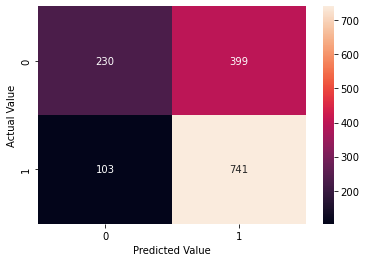

In [515]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

AUC: 0.791


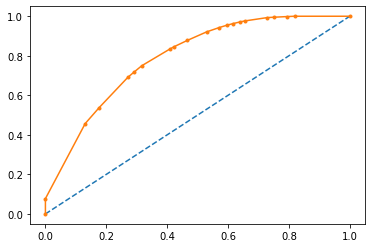

In [516]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.754


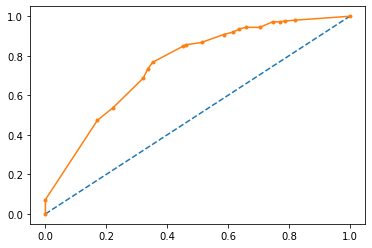

In [517]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [518]:
from sklearn.metrics import classification_report,confusion_matrix

In [519]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.58      0.65       436
           1       0.73      0.85      0.78       595

    accuracy                           0.73      1031
   macro avg       0.73      0.71      0.72      1031
weighted avg       0.73      0.73      0.73      1031



In [520]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       193
           1       0.71      0.86      0.77       249

    accuracy                           0.72       442
   macro avg       0.72      0.70      0.70       442
weighted avg       0.72      0.72      0.71       442



Insights:
Both Logistic regression and have LDA similar results and hence for the given data set both models are in ideal form based on the ROC curve and get ROC_AUC score.

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Insights from LDA:

#### For predicting ‘Contraceptive_method_used’ is “Yes”  (Label 1 ):
1. Precision (65%) – 65% of people predicted are actually   using contraceptions out of all people predicted to have been not using contraceptions
2. Recall (79%) – Out of all the people using contraceptions ,79% of families have been predicted correctly Overall accuracy of the model – 63 % of total predictions are correct

#### For predicting ‘Contraceptive_method_used’ is “No”  (Label 0 ):
1. Precision (65%) – 67% of the people predicted are actually  not using contraceptions out of all families predicted to have been not using contraceptions
2. Recall (68%) – Out of all the people not using contraceptions ,68% of families  have been predicted correctly .


#### Overall accuracy of the model – 63 % of total predictions are correct
#### Accuracy, AUC, Precision and  Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification


Insights from Logistic regression:


#### For predicting ‘Contraceptive_method_used’ is “Yes”  (Label 1 ):
1. Precision (70%) – 70% of people predicted are actually   using contraceptions out of all people predicted to have been not using contraceptions
2. Recall (79%) – Out of all the people using contraceptions ,79% of families have been predicted correctly

#### For predicting ‘Contraceptive_method_used’ is “No”  (Label 0 ):
1. Precision (65%) – 65% of the people predicted are actually  not using contraceptions out of all families predicted to have been not using contraceptions
2. Recall (50%) – Out of all the people not using contraceptions ,50% of families  have been predicted correctly .


#### Overall accuracy of the model – 63 % of total predictions are correct
#### Accuracy, AUC, Precision and  Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification